In [1]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.loggers import WandbLogger
from torch.utils.data import DataLoader

from src.models.BarlowTwinsVQVAE import BarlowTwinsVQVAE

from src.preprocessing.augmentations import Augmentations
from src.preprocessing.preprocess_ucr import AugUCRDataset, UCRDataset, UCRDatasetImporter
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings
from src.utils import save_model

import numpy as np

import matplotlib.pyplot as plt

/home/erlendlokna/Documents/ntnu/representation-learning-VQ-VAE/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
config_dir = 'src/configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)
config['dataset']['dataset_name'] = 'SwedishLeaf'
# data pipeline
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
test_data_loader = build_data_pipeline(batch_size, dataset_importer, config, "test", [], shuffle_train=False)
train_data_loader_non_aug = build_data_pipeline(batch_size, dataset_importer, config, "train", [], shuffle_train=False)
train_data_loader_slope = build_data_pipeline(batch_size, dataset_importer, config, "train",  ['slope'], shuffle_train=False)
train_data_loader_stft = build_data_pipeline(batch_size, dataset_importer, config, "train",  ['STFT'], shuffle_train=False)
train_data_loader_flip = build_data_pipeline(batch_size, dataset_importer, config, "train",  ['flip'], shuffle_train=False)
train_data_loader_ampr = build_data_pipeline(batch_size, dataset_importer, config, "train",  ['AmpR'], shuffle_train=False)
train_data_loader_jitter = build_data_pipeline(batch_size, dataset_importer, config, "train",  ['jitter'], shuffle_train=False)

for batch in train_data_loader_slope:
    x, subxs, y = batch
    x1_slope, x2_slope = subxs
    break

for batch in train_data_loader_stft:
    x, subxs, y = batch
    x1_stft, x2_stft = subxs
    break

for batch in train_data_loader_flip:
    x, subxs, y = batch
    x1_flip, x2_flip = subxs
    break

for batch in train_data_loader_ampr:
    x, subxs, y = batch
    x1_ampr, x2_ampr = subxs
    break

for batch in train_data_loader_jitter:
    x, subxs, y = batch
    x1_jitter, x2_jitter = subxs
    break



x1_slope = x1_slope.squeeze(1)
x2_slope = x2_slope.squeeze(1)
x1_stft = x1_stft.squeeze(1)
x2_stft = x2_stft.squeeze(1)
x1_flip = x1_flip.squeeze(1)
x2_flip = x2_flip.squeeze(1)
x1_ampr = x1_ampr.squeeze(1)
x2_ampr = x2_ampr.squeeze(1)
x1_jitter = x1_jitter.squeeze(1)
x2_jitter = x2_jitter.squeeze(1)
x = x.squeeze(1)


self.X_train.shape: (500, 128)
self.X_test.shape: (625, 128)
# unique labels (train): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
# unique labels (test): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [3]:
x.shape

torch.Size([128, 128])

AttributeError: 'Figure' object has no attribute 'set_title'

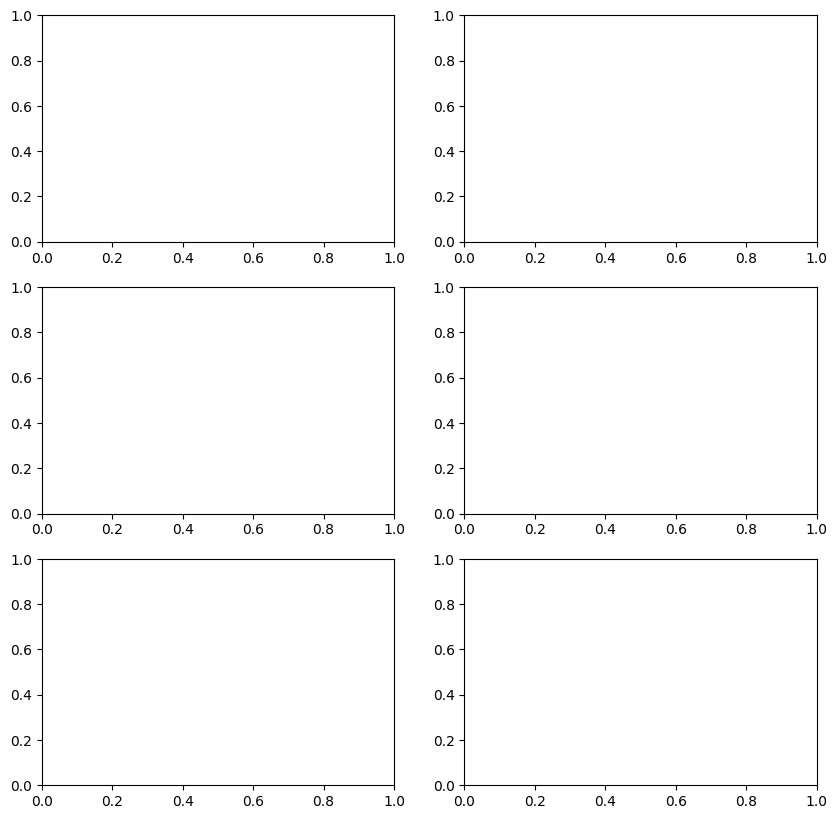

In [44]:
j = 100
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='blue', label='Augmentation')
grey_line = mlines.Line2D([], [], color='grey', alpha=0.4, label='Original')

# Create the legend

f, a = plt.subplots(3, 2, figsize=(10, 10))
f.suptitle("ss")
f.legend(handles=[blue_line, grey_line], loc='upper center', ncol=2)

a[0][0].plot(x[j]); a[0][0].set_title("Original")
a[0][1].plot(x1_stft[j], label="agmentation"); a[0][1].set_title("STFT augmented")
a[0][1].plot(x[j], c="grey", alpha=0.4, label="original");
a[1][0].plot(x1_jitter[j], label="Augmentation"); a[1][0].set_title("Jitter augmented")
a[1][0].plot(x[j], c="grey", alpha=0.4, label="original");
a[1][1].plot(x1_slope[j], label="agmentation"); a[1][1].set_title("slope augmented")
a[1][1].plot(x[j], c="grey", alpha=0.4, label="original");
a[2][0].plot(x1_flip[j], label="agmentation"); a[2][0].set_title("flip augmented")
a[2][0].plot(x[j], c="grey", alpha=0.4, label="original");
a[2][1].plot(x1_ampr[j], label="agmentation"); a[2][1].set_title("Amplitude resize augmentation")
a[2][1].plot(x[j], c="grey", alpha=0.4, label="original");
plt.savefig("Augmentations.pdf")

In [5]:
x.shape[-1]

128

In [6]:
from src.models.BarlowTwinsVQVAE import BarlowTwinsVQVAE
input_length = train_data_loader_non_aug.dataset.X.shape[-1]
m = BarlowTwinsVQVAE(input_length, test_data_loader, train_data_loader_non_aug, config, len(train_data_loader_non_aug))

from src.models.vqvae import VQVAE
m_r = VQVAE(input_length, test_data_loader, train_data_loader_non_aug, config, len(train_data_loader_non_aug))

1
1


In [7]:

x1 = x1.squeeze(1)
x2 = x2.squeeze(1)

NameError: name 'x1' is not defined

In [ ]:

j = np.random.randint(0, len(x1))
print(y[j])
print(len(x1))
print(len(y))
x1 = x1.squeeze(1)
x2 = x2.squeeze(1)
x = x.squeeze(1)
#plt.plot(x2[j])



tensor([1])
30
30


In [ ]:
zs, ys = 

SyntaxError: invalid syntax (2890799038.py, line 1)

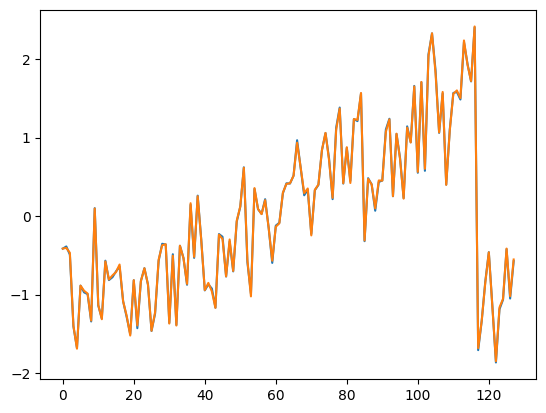

In [ ]:
j = np.random.randint(0, len(x1))
plt.plot(x1[j])
plt.plot(x2[j])

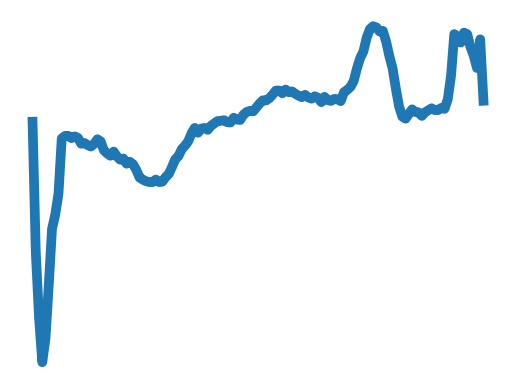

In [ ]:
plt.plot(x1[11], linewidth=7)
plt.axis('off')
plt.savefig("view1.png", transparent=True)
plt.show()

/tmp/ipykernel_73317/1536330491.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=140).
  plt.specgram(x1[j])


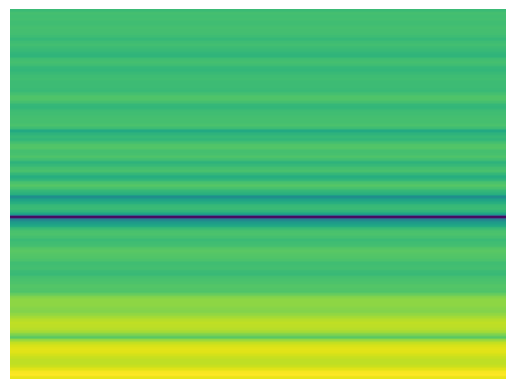

In [ ]:
plt.specgram(x1[j])
plt.axis('off')
plt.savefig("spectogram.png", transparent=True)

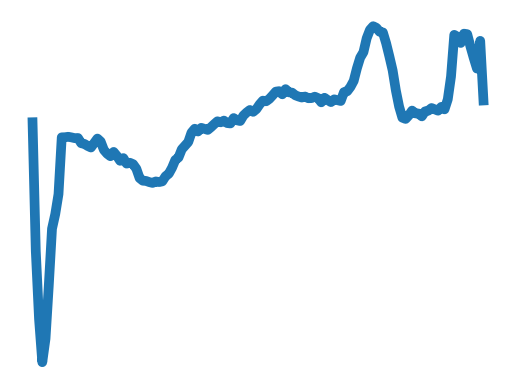

In [ ]:
plt.plot(x2[11], linewidth=7)
plt.axis('off')
plt.savefig("view2.png", transparent=True)
plt.show()

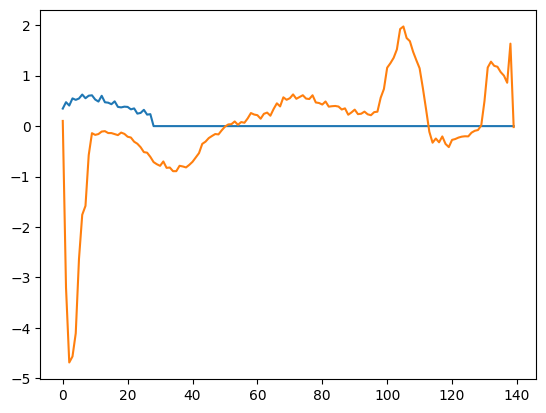

In [ ]:
i = 10
plt.plot(x2[i])
plt.plot(x1[i])

In [ ]:
zs, ys = m.encode_data(train_data_loader_non_aug, m.encoder, cuda=False)

In [ ]:
import umap
import torch

In [ ]:
pr = umap.UMAP().fit_transform(torch.flatten(zs, start_dim=1))

/home/erlendlokna/Documents/ntnu/representation-learning-VQ-VAE/.venv/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


NameError: name 'pr' is not defined

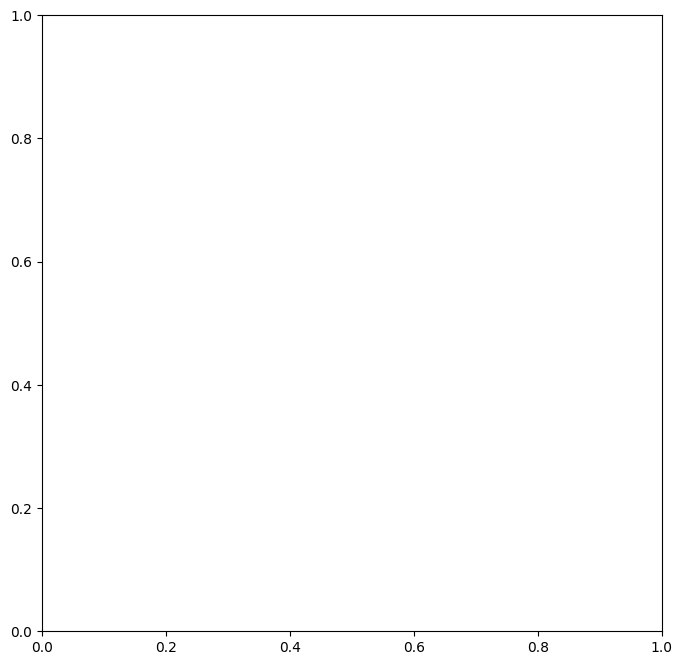

In [ ]:
f, a = plt.subplots(figsize=(8, 8))
a.scatter(pr[:, 0], pr[:, 1], c=ys, s=4)

In [ ]:
from src.experiments.tests import kmeans_clustering_silhouette
zs = torch.flatten(zs, start_dim=1)
sils = kmeans_clustering_silhouette(zs, ys, n_runs=10)

In [ ]:
print(np.std(sils))

0.020662071


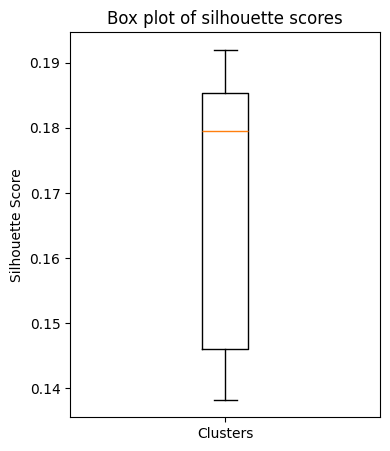

In [ ]:
f, a = plt.subplots(figsize=(4, 5))
a.boxplot(sils)
plt.title('Box plot of silhouette scores')
plt.ylabel('Silhouette Score')
plt.xticks([1], ['Clusters'])
plt.show()

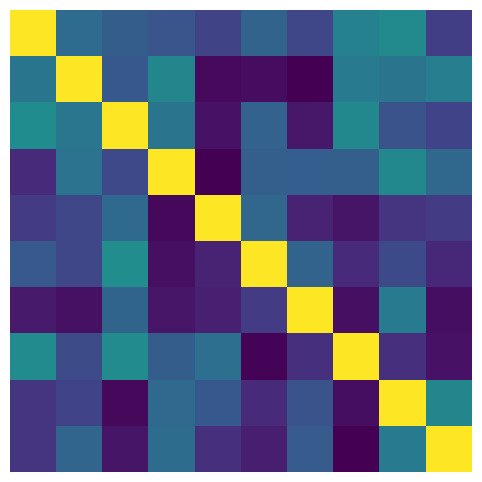

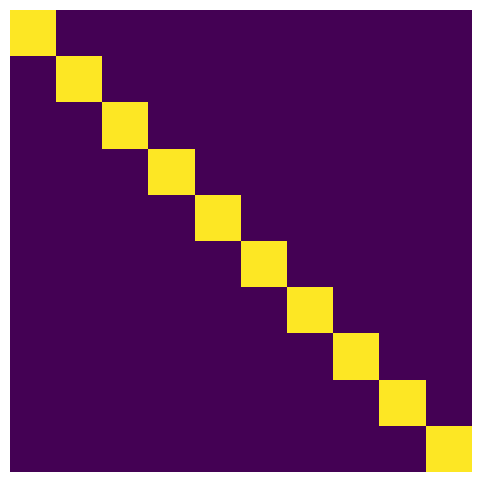

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a cross-correlation matrix with redundancy
np.random.seed(0)  # For reproducibility
size = 10  # Size of the matrix
correlation_matrix = np.random.rand(size, size) * 0.4  # Random values for off-diagonal elements
np.fill_diagonal(correlation_matrix, 0.8)  # Stronger values (1) on the diagonal

# Plotting the cross-correlation matrix
plt.figure(figsize=(8, 6))
plt.axis("off")
plt.imshow(correlation_matrix, cmap='viridis')
plt.savefig("cross_corr.png")
plt.show()

# Creating and plotting the identity matrix
identity_matrix = np.eye(size)

plt.figure(figsize=(8, 6))
plt.imshow(identity_matrix, cmap='viridis')
plt.axis("off")
plt.savefig("identity.png")
plt.show()